汎化性（サイン関数の多項式回帰）サンプル数を変化させる

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)


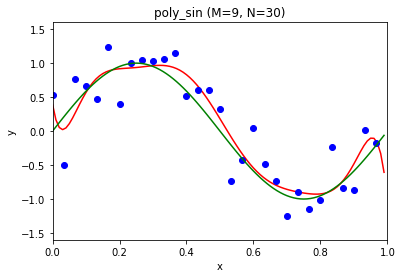

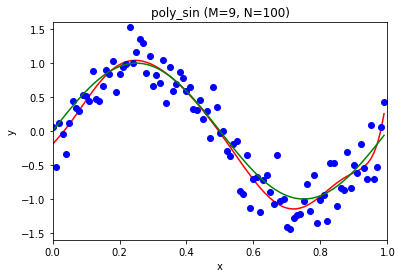

In [3]:
if __name__ == "__main__":

    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)

    M2 = 9
    loc = 0
    scale = 0.3

    N2 = 30
    x_train2 = np.arange(0, 1, 1.0/N2)
    y_train2 =  np.sin(2*np.pi*x_train2) + np.random.normal(loc,scale,N2)

    N3 = 100
    x_train3 = np.arange(0,1, 0.01)
    y_train3 =  np.sin(2*np.pi*x_train3) + np.random.normal(loc,scale,N3)


    W2 = E(x_train2, y_train2, M2)
    W3 = E(x_train3, y_train3, M2)

    y_estimate2 = [y(x, W2, M2) for x in x_real]
    y_estimate3 = [y(x, W3, M2) for x in x_real]

    plt.plot(x_real, y_estimate2, 'r-')
    plt.plot(x_train2, y_train2, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%d, N=%d)" % (M2, N2))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('poly_sin_n%d.eps' % N2)
    plt.show()
    plt.close()


    plt.plot(x_real, y_estimate3, 'r-')
    plt.plot(x_train3, y_train3, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%d, N=%d)" % (M2, N3))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('poly_sin_n%d.eps' % N3)
    plt.show()
    plt.close()
